<a href="https://colab.research.google.com/github/pihaf/Simple-Heart-Disease-Prediction-with-Ensemble-Learning/blob/master/heart_disease_prediction_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 19.9MB/s]


## **1. Data Analysis**

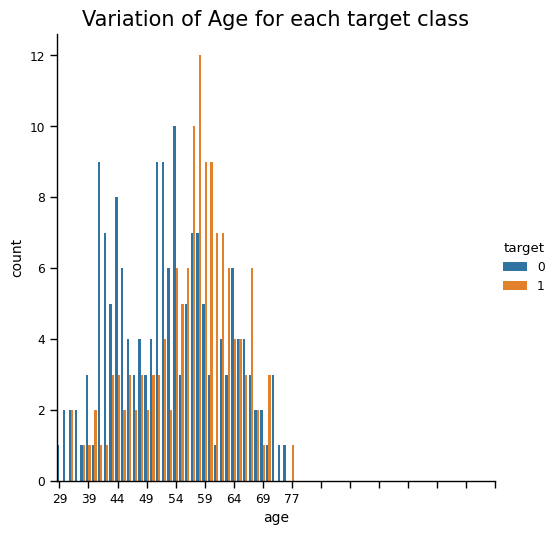

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
sns.set_context("paper", font_scale = 1, rc = {"font.size": 3,"axes.titlesize": 15,"axes.labelsize": 10})
ax = sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
# ax.set(xticklabels=[])
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()

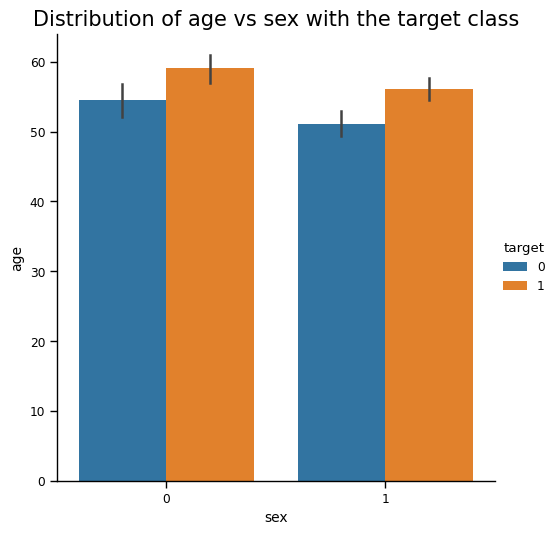

In [4]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

## **2. Model Building**

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN

In [9]:
#########################################   KNeighborsClassifier   #############################################################
###############################################################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
# define the model
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


SVM

In [10]:
#########################################   SVM   #############################################################

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))

Accuracy for training set for SVC = 0.66
Accuracy for test set for SVC = 0.67


Naive Bayes

In [11]:
#########################################   Naive Bayes  #############################################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))

Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


Decision Tree

In [12]:
#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.75


Random Forest

In [13]:
#########################################  Random Forest  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


Adaboost

In [14]:
#################################################################### Adaboost #####################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
# define the model
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


GradientBoost

In [15]:
########################################################## Gradient Boosting #################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import GradientBoostingClassifier
# define the model
classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


XGBoost

In [16]:
########################################################### XGBoost ##############################
from xgboost import XGBClassifier
xg = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


Stacking

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

clf = [('dtc',dtc),('rfc',rfc),('knn',knn), ('gc',gc), ('ad',ad), ('svc', svc)] #list of (str, estimator)
from sklearn.ensemble import StackingClassifier
xg = XGBClassifier()
classifier = StackingClassifier(estimators = clf,final_estimator = xg)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for StackingClassifier = 0.92
Accuracy for test set for StackingClassifier = 0.89
